# Chem 30324, Spring 2017, Homework 9
Due April 19, 2017

## Multi-electron atoms and the self-consistent field.
### Modern calculations on atom and molecules take advantage of the variational principle and are made with sophisticated computer programs that solve the many-electron Schrödinger equation. *Density functional theory* (DFT) is the most common set of approximations for the electron-electron interactions used today. In this problem you’ll do a DFT calculation using the *Gaussian* program (<http://www.gaussian.com>).

### Now, let’s set up your calculation (you may do this with a partner if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to draw an argon (Ar) atom on the screen.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Choose Gaussian
6. Select “Molecular Orbitals” for the Calculation type, “B3LYP” for theory, “Minimal” for the basis set, “0” for the charge, and “Singlet” for the multiplicity.
7. Select the right arrow to run the calculation.
8. From the job manager window choose the completed calculation to view the results.

### 1. Write down the energies of the occupied molecular orbitals and identify them by their shell ( $n = 1, 2, \ldots$) and subshell (s, p, d, ...). For fun, click on the Magnifying Glass icons to see the molecular orbitals in 3-D. You may have to play around with the Display Settings and Preferences to get good views.

|Orbital|Energy (Hartree)|
|-|-|
|1s|-113.791|
|2s|-10.826|
|2p|-8.425|
|3s|-0.8497|
|3p|-0.3178|


### You are welcome to play around with other atoms. For anything other than the noble gases, be sure to set the Multiplicity to a sensible value.

## Molecular Orbitals.
### The orbitals in molecules can be constructed from linear combinations of atomic orbitals on the constituent atoms (in this context, the atomic orbitals are called “basis functions”). One of the factors that determines whether two atomic orbitals can form a molecular orbital is there ability to overlap. Consider two atoms, A and B, aligned on the z axis and separated by a distance $R$.

### 1. The overlap between two 1s orbitals on A and B can be shown to be: $$S = \left \{1+\frac{R}{a_0}+\frac{1}{3}\left (\frac{R}{a_0}\right )^2\right \}e^{-R/a_0}$$ Plot out the overlap as a function of the internuclear distance $R$. Qualitatively explain why it has the shape it has.

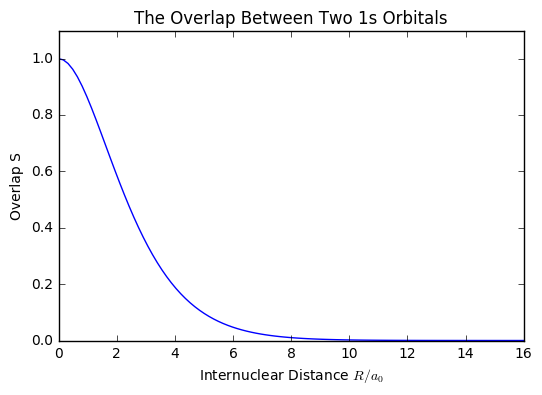

In [17]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0,16,100) # r = R/a_0
P = (1+r+1/3*r**2)*np.exp(-r)
plt.plot(r,P)

plt.xlim(0,16)
plt.ylim(0,1.1)
plt.xlabel('Internuclear Distance $R/a_0$')
plt.ylabel('Overlap S')
plt.title('The Overlap Between Two 1s Orbitals')
plt.show()

At R = 0, the two orbitals overlap completely, thus overlap integral S = 1. As R increases, the orbital overlap decreases, then it approaches a point where there is no orbital overlap (S = 0).

### 2. The overlap functions for other pairs of orbitals are more complicated, but the general features are easily inferred. Neatly sketch the orbital overlap between a 1s orbital on A and 2p$_z$ orbital on B as a function $R$. Carefully indicate the limiting values as $R \rightarrow 0$ and $R \rightarrow \infty$.

![](imgs/HW9-1.jpg)

### 3. Ditto for 1s orbital on A and 2p$_x$ orbital on B.

### 4. Ditto for 2p$_z$ orbital on A and 2p$_z$ orbital on B.

### 5. Ditto for 2p$_z$ orbital on A and 3d$_z^2$ orbital on B.

### 6. What property besides overlap determines whether two atomic orbitals will form a molecular orbital?

The energies of the two atomic orbitals should match.

## The Hückel model and π orbitals

### One of the first successes of molecular orbital theory was application to the π systems of conjugated hydrocarbons. (See [Roberts, Notes on Molecular Orbital Theory](http://resolver.caltech.edu/CaltechBOOK:1961.001).) In the Hückel model, one constructs a π-only secular matrix and uses simple rules for the matrix elements. $S_{ii} = 1$ for a basis function with itself and $S_{ij} = 0$ otherwise. $F_{ii} = \alpha$ for a basis function with itself, $F_{ij}=\beta$ between adjacent atoms, and $F_{ij}=0$ otherwise. 

### 1. Construct and solve the secular matrix for cyclopentane, C$_5$H$_5$.  Make an energy level diagram for the π system.

In [19]:
from sympy import *
alpha,beta = symbols('alpha beta')
M=Matrix([[alpha, beta, 0 , 0, beta],[beta, alpha, beta, 0, 0],[0, beta, alpha, beta, 0],[0, 0, beta, alpha, beta],[beta, 0, 0, beta, alpha]])

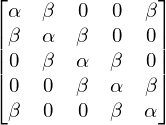

In [20]:
M

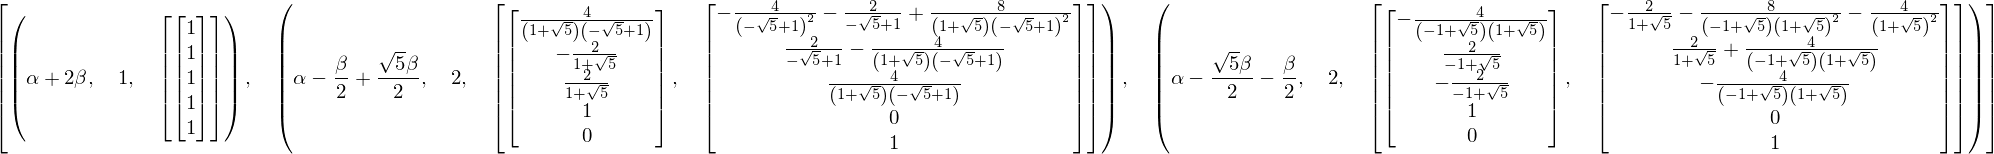

In [21]:
M.eigenvects()

$E_1 = \alpha + 2\beta$, $E_2 = \alpha -\frac{\beta}{2}+ \frac{\sqrt{5}\beta}{2} \approx \alpha + 0.618\beta$, $E_3 = \alpha -\frac{\beta}{2}- \frac{\sqrt{5}\beta}{2} \approx \alpha - 1.618\beta$

![](imgs/HW9-2.jpg)

### 2. Use back-substitution to determine the coefficients for each molecular orbital.

The 5 eigenvectors are the 5 sets of coefficients. Use python to normalize the coefficients to make $c_1^2 + c_2^2 + c_3^2 + c_4^2 + c_5^2 = 1$.

In [22]:
import numpy as np
"eigenvectors" # the munbers in eigenvectors are already simplified using "simplify" in sympy
c1 = [1,1,1,1,1] 
c2 = [-1,-np.sqrt(5)/2 + 1/2,-1/2 + np.sqrt(5)/2,1,0] 
c3 = [-1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 + 1/2,-1,0,1] 
c4 = [-1,1/2 + np.sqrt(5)/2,-np.sqrt(5)/2 - 1/2,1,0] 
c5 = [-np.sqrt(5)/2 - 1/2,1/2 + np.sqrt(5)/2,-1,0,1]
"normalize the coefficients"
s1 = s2 = s4 = 0 # s3 = s2, s5 = s4
n1,n2,n3,n4,n5 = [],[],[],[],[] # normalized eigenvectors
for i in c1:
    s1 = s1 + i**2
for i in c2:
    s2 = s2 + i**2
for i in c4:
    s4 = s4 + i**2
for i in c1:
    n1.append(i/np.sqrt(s1))
for i in c2:
    n2.append(i/np.sqrt(s2))
for i in c3:
    n3.append(i/np.sqrt(s2)) #  s3 = s2
for i in c4:
    n4.append(i/np.sqrt(s4))
for i in c5:
    n5.append(i/np.sqrt(s4)) # s5 = s4
print(n1,n2,n3,n4,n5)

[0.44721359549995793, 0.44721359549995793, 0.44721359549995793, 0.44721359549995793, 0.44721359549995793] [-0.60150095500754575, -0.37174803446018456, 0.37174803446018456, 0.60150095500754575, 0.0] [0.37174803446018456, -0.37174803446018456, -0.60150095500754575, 0.0, 0.60150095500754575] [-0.37174803446018445, 0.60150095500754563, -0.60150095500754563, 0.37174803446018445, 0.0] [-0.60150095500754563, 0.60150095500754563, -0.37174803446018445, 0.0, 0.37174803446018445]


$\psi_1 = 0.4472\phi_1 + 0.4472\phi_2 + 0.4472\phi_3 + 0.4472\phi_4 +0.4472\phi_5$

$\psi_2 = -0.6015\phi_1 -0.3717\phi_2 + 0.3717\phi_3 + 0.6015\phi_4$

$\psi_3 = 0.3717\phi_1 -0.3717\phi_2 -0.6015\phi_3 + 0.6015\phi_5$

$\psi_4 = -0.3717\phi_1 + 0.6015\phi_2 -0.6015\phi_3 + 0.3717\phi_4$

$\psi_5 = -0.6015\phi_1 + 0.6015\phi_2 -0.3717\phi_3 + 0.3717\phi_5$

### 3. Predict the spin-multiplicities of C$_5$H$_5^+$, C$_5$H$_5$, and C$_5$H$_5^-$.  In which one do you expect all the C-C distances to be the same?

According to the energy level diagram for the π system, C$_5$H$_5^+$ has 4 $\pi$ electrons, 2 unpaired electrons, the spin-multiplicity is 3; C$_5$H$_5$ has 5 $\pi$ electrons, 1 unpaired electrons, the spin-multiplicity is 2; C$_5$H$_5^-$ has 6 $\pi$ electrons, 0 unpaired electrons, the spin-multiplicity is 1. C$_5$H$_5^-$ follows the Hückel's rule (has 4n + 2 $\pi$ electrons), so it has aromatic properties and all the C-C distances will be the same.